Mempersiapkan Dataset via Api

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vencerlanz09/shells-or-pebbles-an-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/shells-or-pebbles-an-image-classification-dataset
License(s): CC-BY-SA-4.0
shells-or-pebbles-an-image-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
import os

os.makedirs('/content/Dataset', exist_ok=True)


dataset_zip = zipfile.ZipFile('/content/shells-or-pebbles-an-image-classification-dataset.zip', 'r')
dataset_zip.extractall('/content/Dataset')
dataset_zip.close()

print("Ekstraksi selesai ke folder 'Dataset'")

Ekstraksi selesai ke folder 'Dataset'


In [ ]:
input_folder = "/content/Dataset"
output_folder = "/content/Output"

In [ ]:
!pip install split-folders
import splitfolders
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.7, 0.2,0.1))

Copying files: 4284 files [00:01, 3516.22 files/s]


In [ ]:
train_dir = r"/content/Output/train"
val_dir = r"/content/Output/val"
test_dir = r"/content/Output/test"

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range= 0.1,
)

test_val_datagen = ImageDataGenerator(
                   rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    zoom_range= 0.1,
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(156, 156),
    batch_size=10,
    class_mode='binary'
)

val_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=(156, 156),
    batch_size=10,
    class_mode='binary'
)


test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(156, 156),
    batch_size=10,
    class_mode='binary'
)

Found 2998 images belonging to 2 classes.
Found 856 images belonging to 2 classes.
Found 430 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nAkurasi telah mencapai >99%!")
      self.model.stop_training=True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 200)                 │       1,254,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,453,041 (5.54 MB)

 Trainable params: 1,453,041 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0005),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=20,
    validation_data=val_generator,
    validation_steps=1,
    verbose=1,
    callbacks = callbacks
)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 292ms/step - accuracy: 0.6105 - loss: 0.6318 - val_accuracy: 0.8000 - val_loss: 0.4982
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.5954 - loss: 0.6757 - val_accuracy: 0.7000 - val_loss: 0.6919
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.5851 - loss: 0.6463 - val_accuracy: 0.8000 - val_loss: 0.3730
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 535ms/step - accuracy: 0.6879 - loss: 0.5803 - val_accuracy: 0.8000 - val_loss: 0.5452
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 535ms/step - accuracy: 0.5522 - loss: 0.6552 - val_accuracy: 0.6000 - val_loss: 0.6735
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 264ms/step - accuracy: 0.6767 - loss: 0.6097 - val_accuracy: 0.5000 - val_loss: 0.6028
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.6905 - loss: 0.5884 - val_accuracy: 0.6000 - val_loss: 0.5997
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 367ms/step - accuracy: 0.7457 - loss: 0.5959 - val_accuracy: 0.

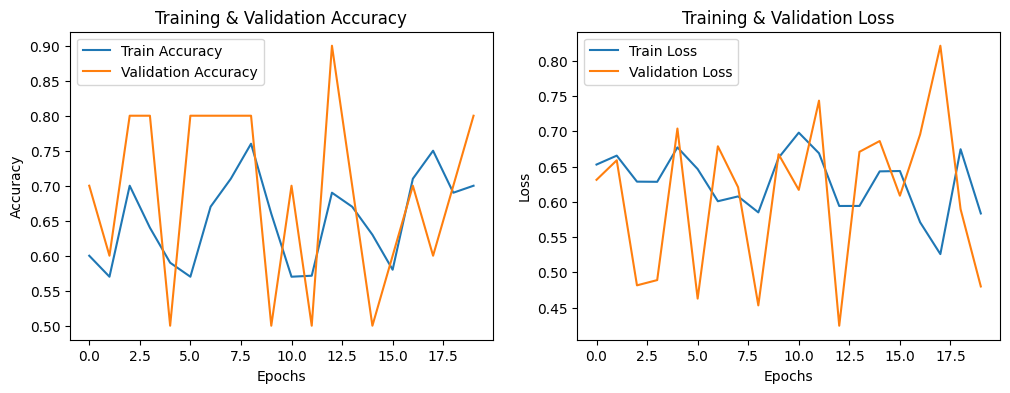

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

history = model.history

plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.show()

Saving shells.jpg to shells (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
shells (1).jpg
This image belongs to class Pebbles


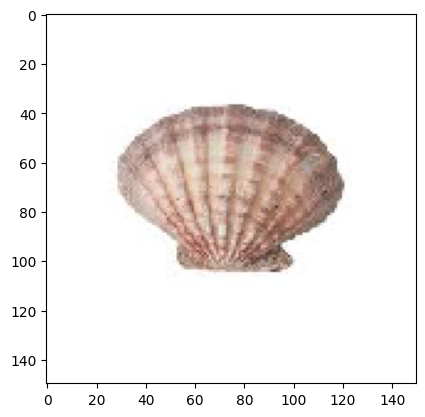

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)

  class_list = os.listdir(train_dir)

  for i in range(42):
    print('This image belongs to class', class_list[i])
    break
